In [137]:
%load_ext autoreload
%autoreload 2

# Control figure size
figsize=(14, 4)

from util import util
import os
data_folder = os.path.join('../..', 'data')
file_name = "Data"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
leagues = ['E0', 'E1', 'E2', 'E3']
start_year, end_year = 2005, 2024
util.fetch_data_into_file(data_folder=data_folder, file_name=file_name, start_year=start_year, end_year=end_year, leagues=leagues)

Data fetched and saved to ../../data/Data.csv


In [138]:
data = util.load_data(data_folder, file_name)
data = data[data['HomeTeam'].isna() == False]
data = data[data['AwayTeam'].isna() == False]
data = data[data['FTR'].isna() == False]
data

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AST,HF,AF,HC,AC,HY,AY,HR,AR,Season
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,...,6.0,14.0,16.0,7.0,8.0,0.0,2.0,0.0,0.0,0506
1,E0,2005-08-13,Everton,Man United,0.0,2.0,A,0.0,1.0,A,...,5.0,15.0,14.0,8.0,6.0,3.0,1.0,0.0,0.0,0506
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,...,4.0,12.0,13.0,6.0,6.0,1.0,2.0,0.0,0.0,0506
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,...,3.0,13.0,11.0,3.0,6.0,2.0,3.0,0.0,0.0,0506
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,...,7.0,17.0,11.0,5.0,0.0,2.0,3.0,1.0,0.0,0506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38422,E3,2024-04-27,Gillingham,Doncaster,2.0,2.0,D,0.0,2.0,A,...,4.0,11.0,12.0,7.0,5.0,2.0,1.0,0.0,1.0,2324
38423,E3,2024-04-27,Milton Keynes Dons,Sutton,4.0,4.0,D,2.0,0.0,H,...,12.0,10.0,13.0,3.0,9.0,2.0,2.0,0.0,0.0,2324
38424,E3,2024-04-27,Salford,Harrogate,2.0,2.0,D,2.0,2.0,D,...,4.0,13.0,9.0,2.0,8.0,0.0,2.0,0.0,0.0,2324
38425,E3,2024-04-27,Swindon,Morecambe,3.0,3.0,D,2.0,2.0,D,...,6.0,5.0,12.0,7.0,7.0,1.0,0.0,0.0,0.0,2324


In [139]:
home_factor, draw_factor, away_factor = data['FTR'].value_counts(normalize=True)['H'], data['FTR'].value_counts(normalize=True)['D'], data['FTR'].value_counts(normalize=True)['A']
home_factor, draw_factor, away_factor

(np.float64(0.43459135866736076),
 np.float64(0.2645236855804269),
 np.float64(0.3008849557522124))

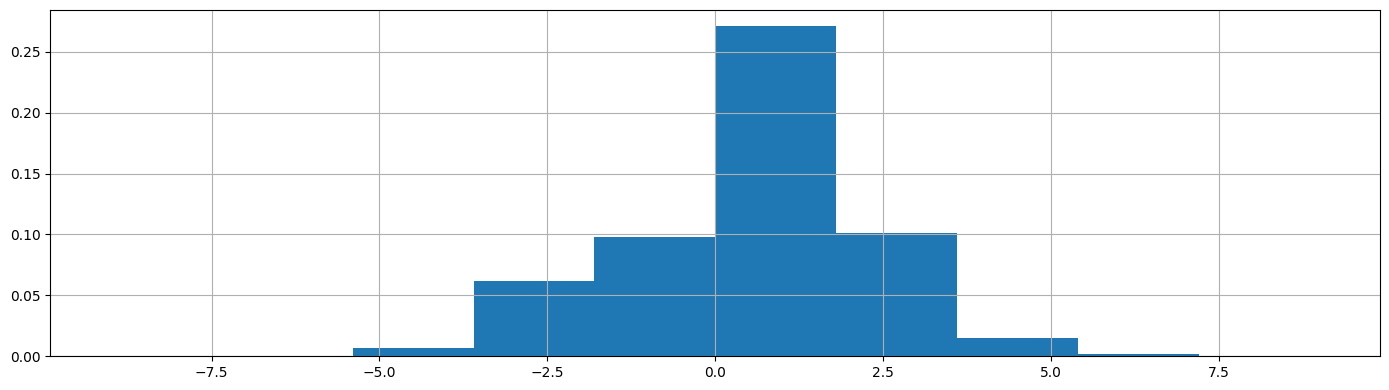

In [140]:
data['Goal difference'] = data['FTHG'] - data['FTAG']
util.plot_histogram(data['Goal difference'], figsize=figsize)

In [141]:
ELO = util.ELO(data, init_rating=1500, draw_factor=draw_factor, k_factor=32, home_advantage=100)
data = ELO.perform_simulations(data)
data = ELO.get_probabilities(data)
data


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HR,AR,Season,Goal difference,Home ELO,Away ELO,ELO diff,Home_prob_ELO,Draw_prob_ELO,Away_prob_ELO
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,...,0.0,0.0,0506,0.0,1500,1500,0,0.544854,0.190423,0.264724
1,E0,2005-08-13,Everton,Man United,0.0,2.0,A,0.0,1.0,A,...,0.0,0.0,0506,-2.0,1500,1500,0,0.544854,0.190423,0.264724
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,...,0.0,0.0,0506,0.0,1500,1500,0,0.544854,0.190423,0.264724
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,...,0.0,0.0,0506,0.0,1500,1500,0,0.544854,0.190423,0.264724
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,...,1.0,0.0,0506,0.0,1500,1500,0,0.544854,0.190423,0.264724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38422,E3,2024-04-27,Gillingham,Doncaster,2.0,2.0,D,0.0,2.0,A,...,0.0,1.0,2324,0.0,889.713157,994.812138,-105.098981,0.362342,0.260642,0.377017
38423,E3,2024-04-27,Milton Keynes Dons,Sutton,4.0,4.0,D,2.0,0.0,H,...,0.0,0.0,2324,0.0,998.924547,839.315186,159.609361,0.768267,0.096952,0.134782
38424,E3,2024-04-27,Salford,Harrogate,2.0,2.0,D,2.0,2.0,D,...,0.0,0.0,2324,0.0,848.766446,892.009727,-43.243281,0.470115,0.221692,0.308194
38425,E3,2024-04-27,Swindon,Morecambe,3.0,3.0,D,2.0,2.0,D,...,0.0,0.0,2324,0.0,827.343081,862.038295,-34.695214,0.485199,0.215381,0.29942


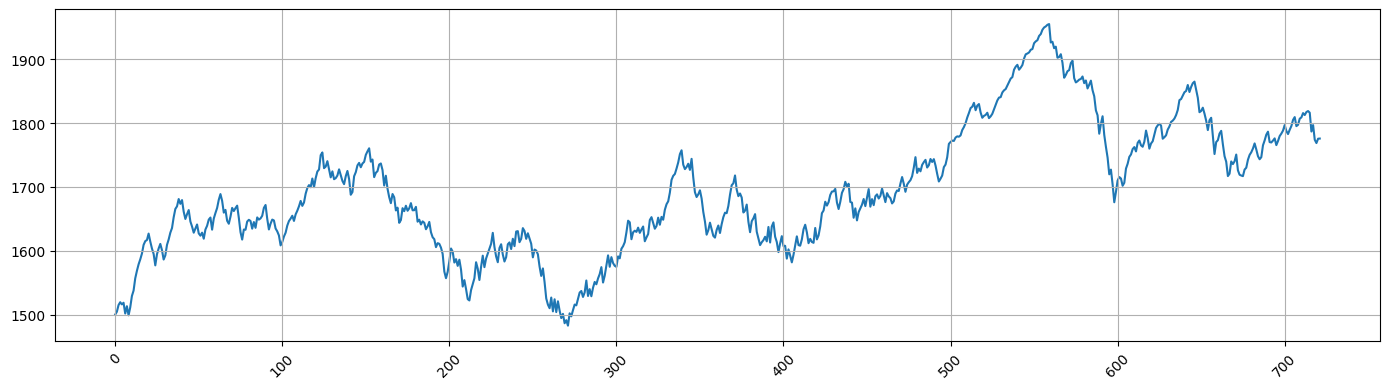

In [142]:
ELO_Liverpool = util.extract_elo_history(data, 'Liverpool')
#ELO_Liverpool.set_index('Date', inplace=True)
util.plot_series(ELO_Liverpool['ELO'], figsize=figsize)

In [143]:
data = util.add_discrete_league_columns(data)
data = util.add_discrete_result_columns(data)
data = util.add_discrete_season_columns(data)
data

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,1415,1516,1617,1718,1819,1920,2021,2122,2223,2324
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,...,False,False,False,False,False,False,False,False,False,False
1,E0,2005-08-13,Everton,Man United,0.0,2.0,A,0.0,1.0,A,...,False,False,False,False,False,False,False,False,False,False
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,...,False,False,False,False,False,False,False,False,False,False
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,...,False,False,False,False,False,False,False,False,False,False
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38422,E3,2024-04-27,Gillingham,Doncaster,2.0,2.0,D,0.0,2.0,A,...,False,False,False,False,False,False,False,False,False,True
38423,E3,2024-04-27,Milton Keynes Dons,Sutton,4.0,4.0,D,2.0,0.0,H,...,False,False,False,False,False,False,False,False,False,True
38424,E3,2024-04-27,Salford,Harrogate,2.0,2.0,D,2.0,2.0,D,...,False,False,False,False,False,False,False,False,False,True
38425,E3,2024-04-27,Swindon,Morecambe,3.0,3.0,D,2.0,2.0,D,...,False,False,False,False,False,False,False,False,False,True


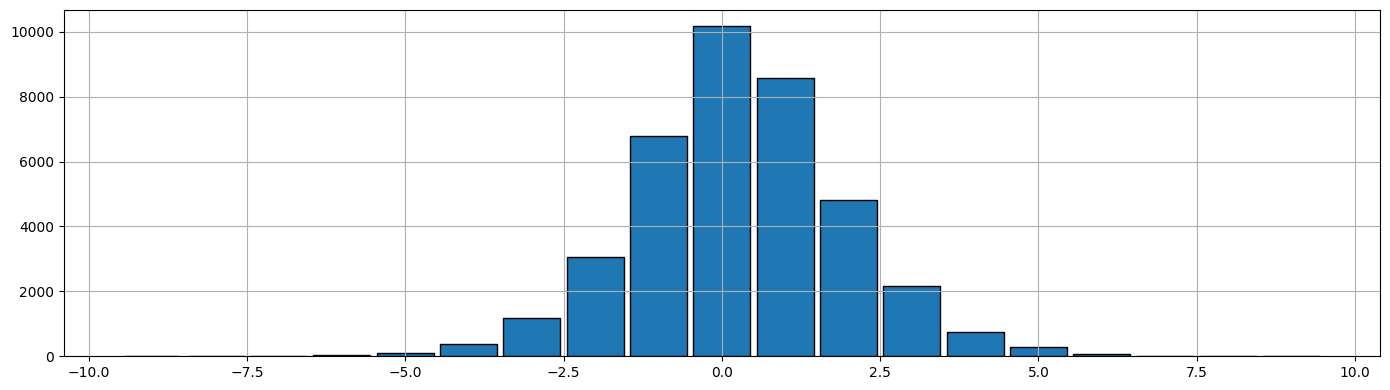

In [144]:
util.plot_discrete_histogram(data['FTHG']-data['FTAG'], figsize=figsize)

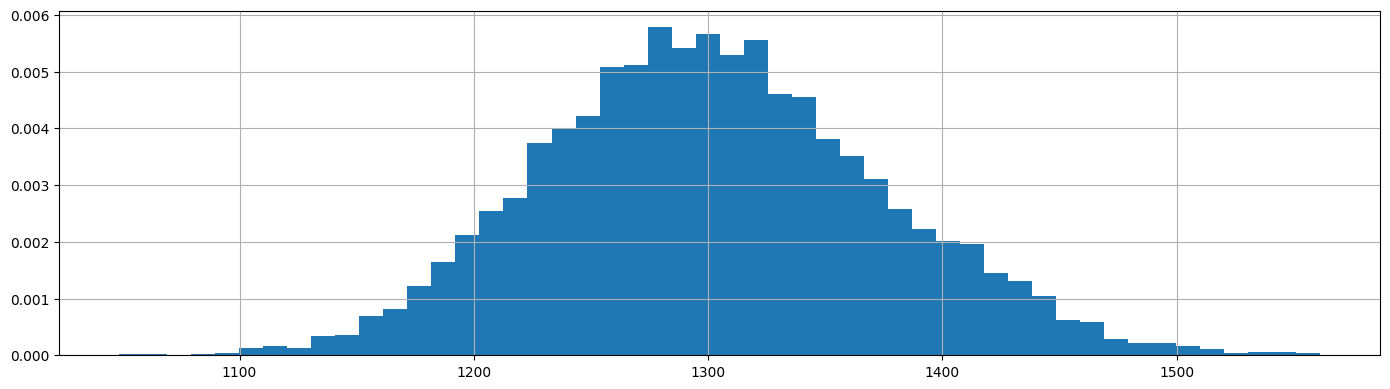

In [145]:
util.plot_histogram(data.loc[data['Div'] == 'E1', 'Home ELO'], figsize=figsize, bins=50)

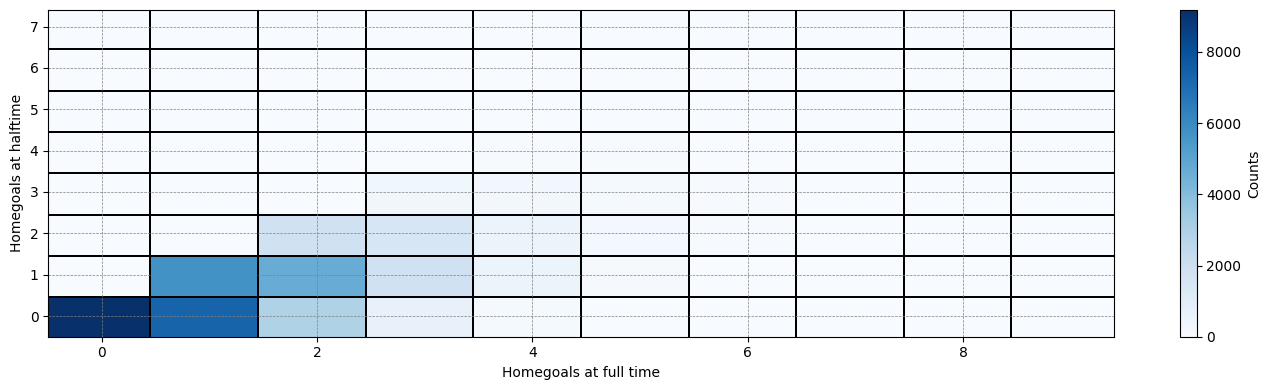

In [146]:
util.plot_discrete_histogram2d(x_data=data['FTHG'], y_data=data['HTHG'], x_label='Homegoals at full time', y_label='Homegoals at halftime', figsize=figsize)

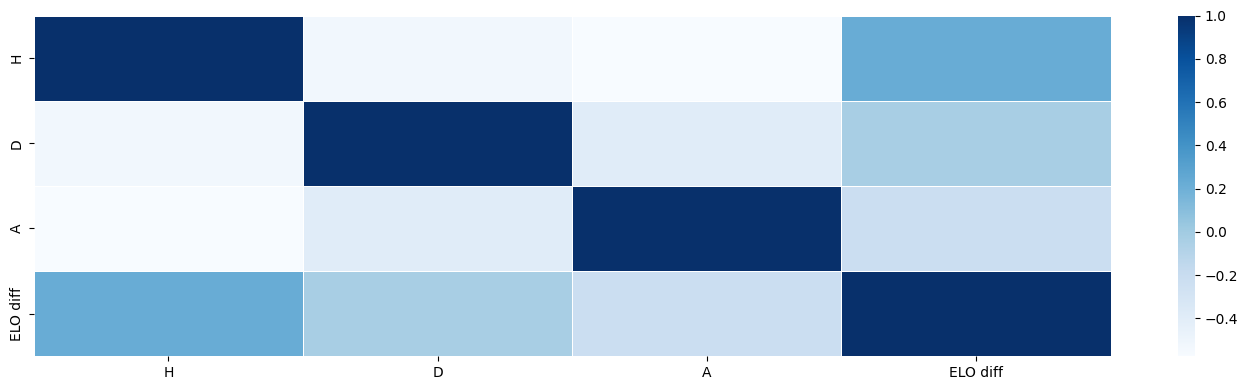

In [147]:
util.plot_correlation_matrix(data[['H', 'D', 'A', 'ELO diff']], figsize=figsize)

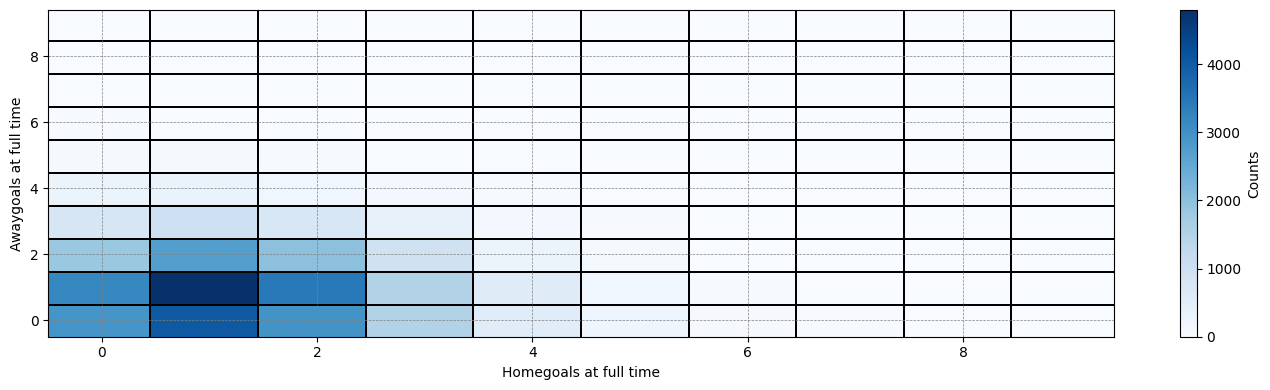

In [148]:
util.plot_discrete_histogram2d(x_data=data['FTHG'], y_data=data['FTAG'], x_label='Homegoals at full time', y_label='Awaygoals at full time', figsize=figsize)

In [150]:
data = util.add_sequential_column(data, 'Home ELO', 'Away ELO', n=6, operation='Change', regard_opponent=False, include_current=False)


In [151]:
data_united = util.get_all_matches_of_team(data, 'Man United')
data_united[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'Home ELO', 'Away ELO', 'ELO diff', 'Home ELO_Change_6', 'Away ELO_Change_6', 'Home ELO_Change_5', 'Away ELO_Change_5']]

,Date,HomeTeam,AwayTeam,FTHG,FTAG,Home ELO,Away ELO,ELO diff,Home ELO_Change_6,Away ELO_Change_6,Home ELO_Change_5,Away ELO_Change_5
1,2005-08-13,Everton,Man United,0.0,2.0,1500,1500,0,0,0,0,0
14,2005-08-20,Man United,Aston Villa,1.0,0.0,1520.48208,1495.51792,24.96416,0,0,20.48208,-4.48208
35,2005-08-28,Newcastle,Man United,0.0,2.0,1473.390341,1530.963225,-57.572885,-15.005391,20.48208,-26.609659,30.963225
39,2005-09-10,Man United,Man City,1.0,1.0,1548.907412,1543.542443,5.364969,30.963225,34.784251,48.907412,43.542443
52,2005-09-18,Liverpool,Man United,0.0,0.0,1519.403898,1544.198653,-24.794754,14.963225,48.907412,19.403898,44.198653
...,...,...,...,...,...,...,...,...,...,...,...,...
36729,2024-04-27,Man United,Burnley,1.0,1.0,1666.737462,1454.752015,211.985446,-10.659289,23.16824,-10.494558,14.658306
36747,2024-05-06,Crystal Palace,Man United,4.0,0.0,1552.188696,1655.292563,-103.103866,45.081761,-13.952831,64.809465,-6.809789
36756,2024-05-12,Man United,Arsenal,0.0,1.0,1639.149628,1824.899135,-185.749507,-21.939457,15.401906,-25.544768,33.40009
36760,2024-05-15,Man United,Newcastle,3.0,2.0,1627.020265,1645.774952,-18.754688,-22.952723,29.477326,-36.688543,-8.165406


In [82]:
data.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'Season', 'Goal difference', 'Home ELO',
       'Away ELO', 'ELO diff', 'Home_prob_ELO', 'Draw_prob_ELO',
       'Away_prob_ELO', 'E0', 'E1', 'E2', 'E3', 'D', 'A', 'H', '0506', '0607',
       '0708', '0809', '0910', '1011', '1112', '1213', '1314', '1415', '1516',
       '1617', '1718', '1819', '1920', '2021', '2122', '2223', '2324',
       'FTHG_Sum_5', 'FTAG_Sum_5', 'FTHG_Mean_5', 'FTAG_Mean_5'],
      dtype='object')